### **Task-1**
### **Prediction using Supervised ML**

Predict the percentage of marks of an student based on the number of study hours
- This is a simple linear regression task as it involves just 2 variables.



**Question Answered here**
- What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
dataurl= "http://bit.ly/w-data"
data = pd.read_csv(dataurl)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape #data dimensions

(25, 2)

In [4]:
data.size #data size

50

In [5]:
data.info() #data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe() #basic statistical information of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.isna().sum() #checking NAN values in the data

Hours     0
Scores    0
dtype: int64

#### Exploring the data:

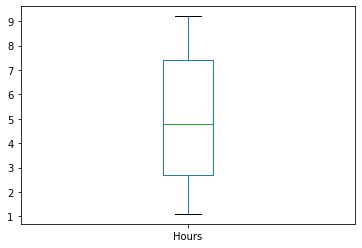

In [8]:
data['Hours'].plot(kind='box')
plt.show()

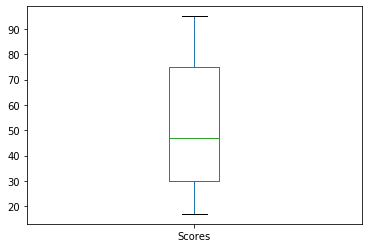

In [9]:
data['Scores'].plot(kind='box')
plt.show()

we can see that there are, No extreme data points in our data

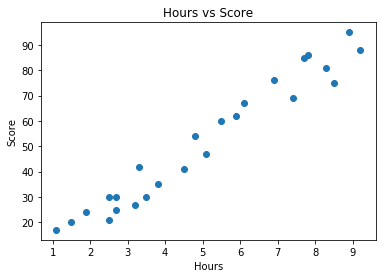

In [10]:
# Plotting the distribution of scores
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs Score')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

From the graph we can  see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

divide the data into inputs and outputs.

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  


- splitting the data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### OLS regression

In [13]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           9.13e-17
Time:                        23:31:12   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- we can see that R-squared is 0.953
- Here R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain .
- **So we can say that our regression model accounts for more of the variance, since data points are closer to the regression line.**

### **Training our Algorithm**

In [14]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('coefficient: ',lr.coef_)
print('Intercept: ',lr.intercept_)
print('Regressor line values:\n',lr.coef_*X+lr.intercept_)

coefficient:  [9.91065648]
Intercept:  2.018160041434683
Regressor line values:
 [[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


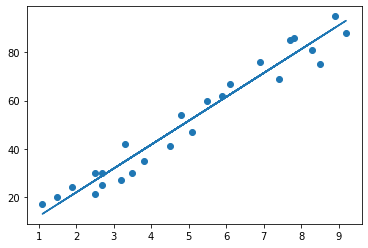

In [16]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_


# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Predicting scores**


In [17]:
y_pred = lr.predict(x_test) # Predicting the scores
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


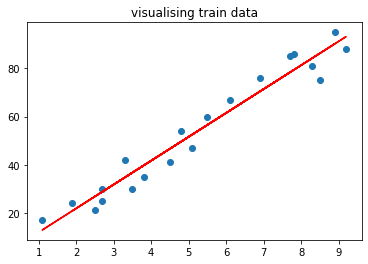

In [19]:
plt.scatter(x=x_train,y=y_train)
plt.plot(x_train, lr.predict(x_train),color='red');
plt.title('visualising train data') 
plt.show()

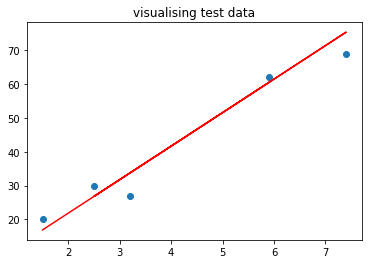

In [20]:
plt.scatter(x=x_test,y=y_test)
plt.plot(x_test, y_pred,color='red');
plt.title('visualising test data') 
plt.show()

**Question**
- What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hours = np.array([9.25,0,0]).reshape(-1,1)
own_pred = lr.predict(hours)
print("Predicted Score ",own_pred[0])

Predicted Score  93.69173248737538


### **Evaluating the model**

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(x_test, y_pred)) 
print('R^2 score- Train data:', lr.score(x_train,y_train))
print('R^2 score- Test data:', lr.score(x_test,y_pred))

Mean Absolute Error: 38.55185161206786
R^2 score- Train data: 0.9515510725211553
R^2 score- Test data: 1.0


In [23]:
rmse = np.sqrt(metrics.mean_squared_error(y_pred, x_test))
print('RMSE:',rmse)

RMSE: 43.260756894203624


In [24]:
# !pip install RISE

- Our model’s MAE is 38.55, which is fairly small; suggests the model is great at prediction
- RMSE can be absolute measure of fit . Lower values of RMSE indicate better fit 
   - our dependent varaible ranges from 19 - 95 and our RMSE is 43 so we can say that our prediction is a better fit